# Neural Network & Logistic Regression Modeling

In [1]:
# Import libraries and modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

# For reproducibility
np.random.seed(42)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras import utils

Using TensorFlow backend.


In [2]:
# read in data
data = pd.read_csv('../data/mortgage_model.csv',dtype={'county_code':str})

In [3]:
data.head()

,lei,county_code,census_tract,preapproval,loan_amount,combined_loan_to_value_ratio,interest_rate,loan_term,interest_only_payment,balloon_payment,...,state_code_UT,state_code_VA,state_code_VT,state_code_WA,state_code_WI,state_code_WV,state_code_WY,loan_type_2,loan_type_3,loan_type_4
0,549300CUF3Q2PQGM9256,21043.0,2.104396e+10,1,115000.0,97.815,4.250,360.0,1,1,...,0,0,0,0,0,0,0,0,0,1
1,549300CUF3Q2PQGM9256,21111.0,2.111101e+10,1,105000.0,100.000,4.375,360.0,1,1,...,0,0,0,0,0,0,0,0,1,0
2,549300CUF3Q2PQGM9256,21239.0,2.123905e+10,1,135000.0,100.256,4.000,360.0,1,1,...,0,0,0,0,0,0,0,0,0,1
3,549300CUF3Q2PQGM9256,21167.0,2.116796e+10,1,55000.0,77.036,4.625,360.0,1,1,...,0,0,0,0,0,0,0,0,0,1
4,549300CUF3Q2PQGM9256,21097.0,2.109795e+10,1,155000.0,100.680,4.500,360.0,1,1,...,0,0,0,0,0,0,0,0,0,1


In [4]:
data.shape

(2671686, 78)

In [5]:
data.dtypes

lei               object
county_code       object
census_tract     float64
preapproval        int64
loan_amount      float64
                  ...   
state_code_WV      int64
state_code_WY      int64
loan_type_2        int64
loan_type_3        int64
loan_type_4        int64
Length: 78, dtype: object

In [6]:
data.columns

Index(['lei', 'county_code', 'census_tract', 'preapproval', 'loan_amount',
       'combined_loan_to_value_ratio', 'interest_rate', 'loan_term',
       'interest_only_payment', 'balloon_payment', 'property_value',
       'occupancy_type', 'total_units', 'income', 'debt_to_income_ratio',
       'submission_of_application', 'denial_reason_1', 'tract_population',
       'ffiec_msa_md_median_family_income', 'tract_to_msa_income_percentage',
       'tract_owner_occupied_units', 'tract_one_to_four_family_homes',
       'tract_median_age_of_housing_units', 'state_code_AL', 'state_code_AR',
       'state_code_AZ', 'state_code_CA', 'state_code_CO', 'state_code_CT',
       'state_code_DC', 'state_code_DE', 'state_code_FL', 'state_code_GA',
       'state_code_GU', 'state_code_HI', 'state_code_IA', 'state_code_ID',
       'state_code_IL', 'state_code_IN', 'state_code_KS', 'state_code_KY',
       'state_code_LA', 'state_code_MA', 'state_code_MD', 'state_code_ME',
       'state_code_MI', 'state_code_

In [7]:
# Set X and y 
X = data.drop(columns=['lei','debt_to_income_ratio','denial_reason_1','county_code'])
y = data['denial_reason_1']

In [8]:
# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=True, stratify = y)

In [9]:
# scale X data
ss = StandardScaler()
Z_train = ss.fit_transform(X_train)
Z_test = ss.transform(X_test)

In [10]:
#change y to binary
y_binary_train = to_categorical(y_train)
y_binary_test = to_categorical(y_test)

In [11]:
y_binary_train[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [12]:
p = X_train.shape[1]

In [13]:
# build model
model = Sequential()
model.add(Dense(36, input_dim=p, activation="relu"))
model.add(Dense(18, input_dim=p, activation="relu"))
model.add(Dense(11, activation="softmax"))

#compile model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [14]:
# Fit model
history = model.fit(
    Z_train, y_binary_train,
    validation_data=(Z_test, y_binary_test),
    epochs=10,
    batch_size=256,
    verbose=1
)

Train on 2003764 samples, validate on 667922 samples
Epoch 1/10
2003764/2003764 [==============================] - 9s 5us/sample - loss: 0.3184 - accuracy: 0.9113 - val_loss: 0.2773 - val_accuracy: 0.9152
Epoch 2/10
2003764/2003764 [==============================] - 9s 5us/sample - loss: 0.2738 - accuracy: 0.9162 - val_loss: 0.2700 - val_accuracy: 0.9176
Epoch 3/10
2003764/2003764 [==============================] - 10s 5us/sample - loss: 0.2689 - accuracy: 0.9180 - val_loss: 0.2671 - val_accuracy: 0.9187
Epoch 4/10
2003764/2003764 [==============================] - 10s 5us/sample - loss: 0.2665 - accuracy: 0.9188 - val_loss: 0.2661 - val_accuracy: 0.9192
Epoch 5/10
2003764/2003764 [==============================] - 11s 6us/sample - loss: 0.2652 - accuracy: 0.9194 - val_loss: 0.2647 - val_accuracy: 0.9196
Epoch 6/10
2003764/2003764 [==============================] - 9s 5us/sample - loss: 0.2642 - accuracy: 0.9197 - val_loss: 0.2639 - val_accuracy: 0.9201
Epoch 7/10
2003764/2003764 [====

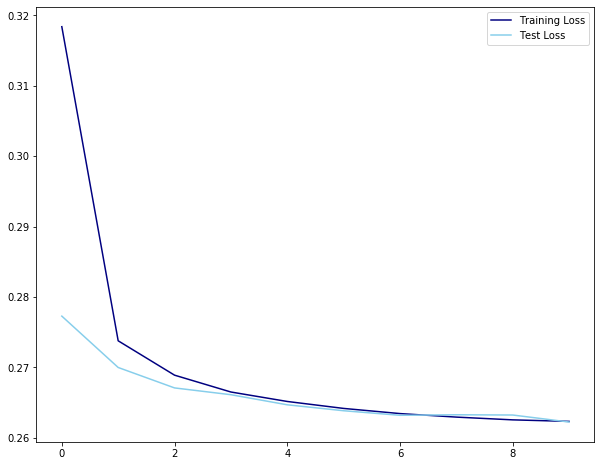

In [15]:

train_loss = history.history['loss']
test_loss = history.history['val_loss']
plt.figure(figsize=(10,8))
plt.plot(train_loss, label="Training Loss", color="navy")
plt.plot(test_loss, label="Test Loss", color="skyblue")
plt.legend();

In [16]:
preds = model.predict(Z_test)

In [17]:
preds

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [3.8857324e-22, 1.4786072e-10, 1.5578132e-15, ..., 3.7676266e-25,
        5.2409327e-12, 1.0000000e+00],
       [3.4669436e-25, 2.9304058e-17, 8.9795710e-26, ..., 3.7906406e-37,
        2.5006029e-20, 1.0000000e+00],
       ...,
       [1.6445005e-13, 2.6691971e-02, 7.2737294e-03, ..., 2.9467314e-05,
        1.0334461e-02, 8.6399388e-01],
       [3.1775440e-11, 1.2458349e-01, 2.3648771e-02, ..., 6.4147194e-04,
        7.9054497e-02, 3.5569817e-01],
       [2.7878985e-29, 8.2604596e-16, 4.1138970e-24, ..., 0.0000000e+00,
        1.1862378e-17, 1.0000000e+00]], dtype=float32)

In [18]:
y_binary_test[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [19]:
preds[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [20]:
np.argmax(preds[65]) 

10

In [21]:
preds_list = []
for i in range(len(preds)):
    preds_list.append(np.argmax(preds[i]))

In [22]:
set(preds_list)

{1, 3, 4, 5, 6, 7, 9, 10}

In [23]:
accuracy_score(y_test,preds_list)

0.9207557169849174

## 10 Classification - Logistic Regression

In [24]:
# test Logistic Regression
lr = LogisticRegression()

lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
lr_preds = lr.predict(X_test)

In [26]:
accuracy_score(y_test,lr_preds)

0.9127637658289441

In [27]:
lr.get_params

<bound method BaseEstimator.get_params of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)>

## Grid Search NN

In [29]:
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [86]:
def model_func(layer_one_neurons=32, layer_one_dropout=.2, layer_two_neurons=32):
#    print('layer_one_neurons', layer_one_neurons, 'layer_two_neurons', layer_two_neurons)
    model = Sequential()
    model.add(Dense(layer_one_neurons, activation='relu', input_shape =(75,)))
    model.add(Dropout(layer_one_dropout))
    model.add(Dense(layer_two_neurons, activation='relu'))
    model.add(Dense(11, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

nn = KerasClassifier(build_fn=model_func, batch_size=512, verbose=1)

params = {
    'epochs': [10,20,50],
    'layer_one_neurons' : [32,64],
    'layer_two_neurons' : [18, 24],
    'layer_one_dropout' : [.2, .5]
}
gs = GridSearchCV(nn, param_grid=params, cv=2)

gs.fit(Z_train, y_binary_train)
print(gs.best_score_)
gs.best_params_

Train on 1001882 samples
Epoch 1/10
1001882/1001882 [==============================] - 3s 3us/sample - loss: 0.4408 - accuracy: 0.9021
Epoch 2/10
1001882/1001882 [==============================] - 2s 2us/sample - loss: 0.2888 - accuracy: 0.9136
Epoch 3/10
1001882/1001882 [==============================] - 2s 2us/sample - loss: 0.2821 - accuracy: 0.9144
Epoch 4/10
1001882/1001882 [==============================] - 2s 2us/sample - loss: 0.2787 - accuracy: 0.9152
Epoch 5/10
1001882/1001882 [==============================] - 2s 2us/sample - loss: 0.2757 - accuracy: 0.9160
Epoch 6/10
1001882/1001882 [==============================] - 2s 2us/sample - loss: 0.2736 - accuracy: 0.9167
Epoch 7/10
1001882/1001882 [==============================] - 2s 2us/sample - loss: 0.2720 - accuracy: 0.9172
Epoch 8/10
1001882/1001882 [==============================] - 2s 2us/sample - loss: 0.2711 - accuracy: 0.9176
Epoch 9/10
1001882/1001882 [==============================] - 2s 2us/sample - loss: 0.2700 - ac

1001882/1001882 [==============================] - 3s 3us/sample - loss: 0.2826 - accuracy: 0.9148
Epoch 5/10
1001882/1001882 [==============================] - 3s 3us/sample - loss: 0.2804 - accuracy: 0.9152
Epoch 6/10
1001882/1001882 [==============================] - 3s 3us/sample - loss: 0.2776 - accuracy: 0.9157
Epoch 7/10
1001882/1001882 [==============================] - 2s 2us/sample - loss: 0.2756 - accuracy: 0.9161
Epoch 8/10
1001882/1001882 [==============================] - 2s 2us/sample - loss: 0.2748 - accuracy: 0.9166
Epoch 9/10
1001882/1001882 [==============================] - 2s 2us/sample - loss: 0.2743 - accuracy: 0.9169
Epoch 10/10
1001882/1001882 [==============================] - 1s 1us/sample - loss: 0.2680 - accuracy: 0.9185
Train on 1001882 samples
Epoch 1/10
1001882/1001882 [==============================] - 3s 3us/sample - loss: 0.4346 - accuracy: 0.9047
Epoch 2/10
1001882/1001882 [==============================] - 2s 2us/sample - loss: 0.2926 - accuracy: 0.

1001882/1001882 [==============================] - 3s 3us/sample - loss: 0.2662 - accuracy: 0.9189
Epoch 13/20
1001882/1001882 [==============================] - 3s 3us/sample - loss: 0.2656 - accuracy: 0.9192
Epoch 14/20
1001882/1001882 [==============================] - 3s 3us/sample - loss: 0.2654 - accuracy: 0.9193
Epoch 15/20
1001882/1001882 [==============================] - 3s 3us/sample - loss: 0.2652 - accuracy: 0.9194
Epoch 16/20
1001882/1001882 [==============================] - 3s 3us/sample - loss: 0.2649 - accuracy: 0.9195
Epoch 17/20
1001882/1001882 [==============================] - 3s 3us/sample - loss: 0.2645 - accuracy: 0.9197
Epoch 18/20
1001882/1001882 [==============================] - 3s 3us/sample - loss: 0.2644 - accuracy: 0.9198
Epoch 19/20
1001882/1001882 [==============================] - 3s 3us/sample - loss: 0.2644 - accuracy: 0.9197
Epoch 20/20
1001882/1001882 [==============================] - 1s 1us/sample - loss: 0.2635 - accuracy: 0.9199
Train on 1001

1001882/1001882 [==============================] - 2s 2us/sample - loss: 0.2722 - accuracy: 0.9170
Epoch 12/20
1001882/1001882 [==============================] - 2s 2us/sample - loss: 0.2717 - accuracy: 0.9173
Epoch 13/20
1001882/1001882 [==============================] - 2s 2us/sample - loss: 0.2713 - accuracy: 0.9174
Epoch 14/20
1001882/1001882 [==============================] - 2s 2us/sample - loss: 0.2711 - accuracy: 0.9176
Epoch 15/20
1001882/1001882 [==============================] - 2s 2us/sample - loss: 0.2707 - accuracy: 0.9178
Epoch 16/20
1001882/1001882 [==============================] - 2s 2us/sample - loss: 0.2704 - accuracy: 0.9179
Epoch 17/20
1001882/1001882 [==============================] - 2s 2us/sample - loss: 0.2702 - accuracy: 0.9179
Epoch 18/20
1001882/1001882 [==============================] - 2s 2us/sample - loss: 0.2698 - accuracy: 0.9180
Epoch 19/20
1001882/1001882 [==============================] - 2s 2us/sample - loss: 0.2697 - accuracy: 0.9181
Epoch 20/20
1

1001882/1001882 [==============================] - 2s 2us/sample - loss: 0.2664 - accuracy: 0.9195
Epoch 23/50
1001882/1001882 [==============================] - 2s 2us/sample - loss: 0.2661 - accuracy: 0.9195
Epoch 24/50
1001882/1001882 [==============================] - 2s 2us/sample - loss: 0.2661 - accuracy: 0.9195
Epoch 25/50
1001882/1001882 [==============================] - 2s 2us/sample - loss: 0.2659 - accuracy: 0.9195
Epoch 26/50
1001882/1001882 [==============================] - 2s 2us/sample - loss: 0.2657 - accuracy: 0.9197
Epoch 27/50
1001882/1001882 [==============================] - 2s 2us/sample - loss: 0.2658 - accuracy: 0.9196
Epoch 28/50
1001882/1001882 [==============================] - 2s 2us/sample - loss: 0.2655 - accuracy: 0.9197
Epoch 29/50
1001882/1001882 [==============================] - 2s 2us/sample - loss: 0.2658 - accuracy: 0.9195
Epoch 30/50
1001882/1001882 [==============================] - 2s 2us/sample - loss: 0.2652 - accuracy: 0.9197
Epoch 31/50
1

1001882/1001882 [==============================] - 2s 2us/sample - loss: 0.2655 - accuracy: 0.9193
Epoch 16/50
1001882/1001882 [==============================] - 2s 2us/sample - loss: 0.2651 - accuracy: 0.9193
Epoch 17/50
1001882/1001882 [==============================] - 2s 2us/sample - loss: 0.2649 - accuracy: 0.9194
Epoch 18/50
1001882/1001882 [==============================] - 2s 2us/sample - loss: 0.2647 - accuracy: 0.9194
Epoch 19/50
1001882/1001882 [==============================] - 3s 3us/sample - loss: 0.2645 - accuracy: 0.9196
Epoch 20/50
1001882/1001882 [==============================] - 2s 2us/sample - loss: 0.2645 - accuracy: 0.9195
Epoch 21/50
1001882/1001882 [==============================] - 2s 2us/sample - loss: 0.2641 - accuracy: 0.9196
Epoch 22/50
1001882/1001882 [==============================] - 2s 2us/sample - loss: 0.2641 - accuracy: 0.9198
Epoch 23/50
1001882/1001882 [==============================] - 2s 2us/sample - loss: 0.2640 - accuracy: 0.9197
Epoch 24/50
1

1001882/1001882 [==============================] - 2s 2us/sample - loss: 0.2683 - accuracy: 0.9183
Epoch 9/50
1001882/1001882 [==============================] - 2s 2us/sample - loss: 0.2677 - accuracy: 0.9186
Epoch 10/50
1001882/1001882 [==============================] - 2s 2us/sample - loss: 0.2671 - accuracy: 0.9188
Epoch 11/50
1001882/1001882 [==============================] - 2s 2us/sample - loss: 0.2666 - accuracy: 0.9189
Epoch 12/50
1001882/1001882 [==============================] - 2s 2us/sample - loss: 0.2662 - accuracy: 0.9190
Epoch 13/50
1001882/1001882 [==============================] - 2s 2us/sample - loss: 0.2660 - accuracy: 0.9192
Epoch 14/50
1001882/1001882 [==============================] - 2s 2us/sample - loss: 0.2654 - accuracy: 0.9193
Epoch 15/50
1001882/1001882 [==============================] - 2s 2us/sample - loss: 0.2652 - accuracy: 0.9192
Epoch 16/50
1001882/1001882 [==============================] - 2s 2us/sample - loss: 0.2649 - accuracy: 0.9195
Epoch 17/50
10

1001882/1001882 [==============================] - 2s 2us/sample - loss: 0.4569 - accuracy: 0.9057
Epoch 2/50
1001882/1001882 [==============================] - 2s 2us/sample - loss: 0.2988 - accuracy: 0.9131
Epoch 3/50
1001882/1001882 [==============================] - 2s 2us/sample - loss: 0.2892 - accuracy: 0.9132
Epoch 4/50
1001882/1001882 [==============================] - 2s 2us/sample - loss: 0.2855 - accuracy: 0.9140
Epoch 5/50
1001882/1001882 [==============================] - 2s 2us/sample - loss: 0.2840 - accuracy: 0.9144
Epoch 6/50
1001882/1001882 [==============================] - 2s 2us/sample - loss: 0.2832 - accuracy: 0.9145
Epoch 7/50
1001882/1001882 [==============================] - 2s 2us/sample - loss: 0.2821 - accuracy: 0.9147
Epoch 8/50
1001882/1001882 [==============================] - 2s 2us/sample - loss: 0.2814 - accuracy: 0.9151
Epoch 9/50
1001882/1001882 [==============================] - 2s 2us/sample - loss: 0.2810 - accuracy: 0.9153
Epoch 10/50
1001882/1

Epoch 24/50
1001882/1001882 [==============================] - 2s 2us/sample - loss: 0.2748 - accuracy: 0.9171
Epoch 25/50
1001882/1001882 [==============================] - 2s 2us/sample - loss: 0.2749 - accuracy: 0.9173
Epoch 26/50
1001882/1001882 [==============================] - 2s 2us/sample - loss: 0.2750 - accuracy: 0.9173
Epoch 27/50
1001882/1001882 [==============================] - 2s 2us/sample - loss: 0.2749 - accuracy: 0.9172
Epoch 28/50
1001882/1001882 [==============================] - 2s 2us/sample - loss: 0.2747 - accuracy: 0.9174
Epoch 29/50
1001882/1001882 [==============================] - 2s 2us/sample - loss: 0.2747 - accuracy: 0.9174
Epoch 30/50
1001882/1001882 [==============================] - 2s 2us/sample - loss: 0.2744 - accuracy: 0.9174
Epoch 31/50
1001882/1001882 [==============================] - 2s 2us/sample - loss: 0.2744 - accuracy: 0.9174
Epoch 32/50
1001882/1001882 [==============================] - 2s 2us/sample - loss: 0.2743 - accuracy: 0.9174
E

1001882/1001882 [==============================] - 2s 2us/sample - loss: 0.2710 - accuracy: 0.9178
Epoch 18/50
1001882/1001882 [==============================] - 2s 2us/sample - loss: 0.2701 - accuracy: 0.9178
Epoch 19/50
1001882/1001882 [==============================] - 2s 2us/sample - loss: 0.2703 - accuracy: 0.9178
Epoch 20/50
1001882/1001882 [==============================] - 2s 2us/sample - loss: 0.2704 - accuracy: 0.9180
Epoch 21/50
1001882/1001882 [==============================] - 2s 2us/sample - loss: 0.2698 - accuracy: 0.9180
Epoch 22/50
1001882/1001882 [==============================] - 2s 2us/sample - loss: 0.2699 - accuracy: 0.9180
Epoch 23/50
1001882/1001882 [==============================] - 2s 2us/sample - loss: 0.2695 - accuracy: 0.9182
Epoch 24/50
1001882/1001882 [==============================] - 2s 2us/sample - loss: 0.2695 - accuracy: 0.9182
Epoch 25/50
1001882/1001882 [==============================] - 2s 2us/sample - loss: 0.2695 - accuracy: 0.9180
Epoch 26/50
1

{'epochs': 50,
 'layer_one_dropout': 0.2,
 'layer_one_neurons': 64,
 'layer_two_neurons': 24}

In [87]:
def model_func(layer_one_neurons=32, layer_one_dropout=.2, layer_two_neurons=32):
#    print('layer_one_neurons', layer_one_neurons, 'layer_two_neurons', layer_two_neurons)
    model = Sequential()
    model.add(Dense(layer_one_neurons, activation='relu', input_shape =(75,)))
    model.add(Dropout(layer_one_dropout))
    model.add(Dense(layer_two_neurons, activation='relu'))
    model.add(Dense(11, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

nn = KerasClassifier(build_fn=model_func, batch_size=512, verbose=1)

params = {
    'epochs': [50,100,200],
    'layer_one_neurons' : [64,128],
    'layer_two_neurons' : [24],
    'layer_one_dropout' : [.5]
}
gs = GridSearchCV(nn, param_grid=params, cv=2)

gs.fit(Z_train, y_binary_train)
print(gs.best_score_)
gs.best_params_

Train on 1001882 samples
Epoch 1/50
1001882/1001882 [==============================] - 5s 5us/sample - loss: 0.4505 - accuracy: 0.9012
Epoch 2/50
1001882/1001882 [==============================] - 2s 2us/sample - loss: 0.2930 - accuracy: 0.9134
Epoch 3/50
1001882/1001882 [==============================] - 2s 2us/sample - loss: 0.2855 - accuracy: 0.9139
Epoch 4/50
1001882/1001882 [==============================] - 2s 2us/sample - loss: 0.2819 - accuracy: 0.9145
Epoch 5/50
1001882/1001882 [==============================] - 2s 2us/sample - loss: 0.2792 - accuracy: 0.9152
Epoch 6/50
1001882/1001882 [==============================] - 2s 2us/sample - loss: 0.2769 - accuracy: 0.9159
Epoch 7/50
1001882/1001882 [==============================] - 2s 2us/sample - loss: 0.2752 - accuracy: 0.9164
Epoch 8/50
1001882/1001882 [==============================] - 2s 2us/sample - loss: 0.2740 - accuracy: 0.9167
Epoch 9/50
1001882/1001882 [==============================] - 2s 2us/sample - loss: 0.2732 - ac

1001882/1001882 [==============================] - 3s 3us/sample - loss: 0.2644 - accuracy: 0.9194
Epoch 46/50
1001882/1001882 [==============================] - 3s 3us/sample - loss: 0.2649 - accuracy: 0.9195
Epoch 47/50
1001882/1001882 [==============================] - 3s 3us/sample - loss: 0.2647 - accuracy: 0.9195
Epoch 48/50
1001882/1001882 [==============================] - 3s 3us/sample - loss: 0.2645 - accuracy: 0.9196
Epoch 49/50
1001882/1001882 [==============================] - 3s 3us/sample - loss: 0.2646 - accuracy: 0.9195
Epoch 50/50
1001882/1001882 [==============================] - 1s 1us/sample - loss: 0.2625 - accuracy: 0.9209
Train on 1001882 samples
Epoch 1/50
1001882/1001882 [==============================] - 3s 3us/sample - loss: 0.3785 - accuracy: 0.9111
Epoch 2/50
1001882/1001882 [==============================] - 3s 3us/sample - loss: 0.2876 - accuracy: 0.9137
Epoch 3/50
1001882/1001882 [==============================] - 3s 3us/sample - loss: 0.2816 - accuracy

1001882/1001882 [==============================] - 2s 2us/sample - loss: 0.2660 - accuracy: 0.9195
Epoch 90/100
1001882/1001882 [==============================] - 2s 2us/sample - loss: 0.2658 - accuracy: 0.9193
Epoch 91/100
1001882/1001882 [==============================] - 2s 2us/sample - loss: 0.2660 - accuracy: 0.9192
Epoch 92/100
1001882/1001882 [==============================] - 2s 2us/sample - loss: 0.2660 - accuracy: 0.9192
Epoch 93/100
1001882/1001882 [==============================] - 2s 2us/sample - loss: 0.2659 - accuracy: 0.9194
Epoch 94/100
1001882/1001882 [==============================] - 2s 2us/sample - loss: 0.2659 - accuracy: 0.9194
Epoch 95/100
1001882/1001882 [==============================] - 2s 2us/sample - loss: 0.2658 - accuracy: 0.9194
Epoch 96/100
1001882/1001882 [==============================] - 2s 2us/sample - loss: 0.2658 - accuracy: 0.9194
Epoch 97/100
1001882/1001882 [==============================] - 2s 2us/sample - loss: 0.2659 - accuracy: 0.9194
Epoch

1001882/1001882 [==============================] - 3s 3us/sample - loss: 0.2655 - accuracy: 0.9191
Epoch 34/100
1001882/1001882 [==============================] - 3s 3us/sample - loss: 0.2655 - accuracy: 0.9192
Epoch 35/100
1001882/1001882 [==============================] - 3s 3us/sample - loss: 0.2654 - accuracy: 0.9192
Epoch 36/100
1001882/1001882 [==============================] - 3s 3us/sample - loss: 0.2653 - accuracy: 0.9192
Epoch 37/100
1001882/1001882 [==============================] - 3s 3us/sample - loss: 0.2652 - accuracy: 0.9192
Epoch 38/100
1001882/1001882 [==============================] - 3s 3us/sample - loss: 0.2651 - accuracy: 0.9194
Epoch 39/100
1001882/1001882 [==============================] - 3s 3us/sample - loss: 0.2650 - accuracy: 0.9193
Epoch 40/100
1001882/1001882 [==============================] - 3s 3us/sample - loss: 0.2651 - accuracy: 0.9192
Epoch 41/100
1001882/1001882 [==============================] - 3s 3us/sample - loss: 0.2651 - accuracy: 0.9194
Epoch

1001882/1001882 [==============================] - 3s 3us/sample - loss: 0.2628 - accuracy: 0.9204
Epoch 79/100
1001882/1001882 [==============================] - 3s 3us/sample - loss: 0.2627 - accuracy: 0.9204
Epoch 80/100
1001882/1001882 [==============================] - 3s 3us/sample - loss: 0.2627 - accuracy: 0.9204
Epoch 81/100
1001882/1001882 [==============================] - 3s 3us/sample - loss: 0.2627 - accuracy: 0.9204
Epoch 82/100
1001882/1001882 [==============================] - 3s 3us/sample - loss: 0.2626 - accuracy: 0.9203
Epoch 83/100
1001882/1001882 [==============================] - 3s 3us/sample - loss: 0.2626 - accuracy: 0.9206
Epoch 84/100
1001882/1001882 [==============================] - 3s 3us/sample - loss: 0.2626 - accuracy: 0.9205
Epoch 85/100
1001882/1001882 [==============================] - 3s 3us/sample - loss: 0.2624 - accuracy: 0.9205
Epoch 86/100
1001882/1001882 [==============================] - 3s 3us/sample - loss: 0.2625 - accuracy: 0.9207
Epoch

1001882/1001882 [==============================] - 3s 3us/sample - loss: 0.2652 - accuracy: 0.9196
Epoch 124/200
1001882/1001882 [==============================] - 2s 2us/sample - loss: 0.2652 - accuracy: 0.9198
Epoch 125/200
1001882/1001882 [==============================] - 2s 2us/sample - loss: 0.2653 - accuracy: 0.9196
Epoch 126/200
1001882/1001882 [==============================] - 3s 2us/sample - loss: 0.2652 - accuracy: 0.9196
Epoch 127/200
1001882/1001882 [==============================] - 2s 2us/sample - loss: 0.2652 - accuracy: 0.9196
Epoch 128/200
1001882/1001882 [==============================] - 2s 2us/sample - loss: 0.2652 - accuracy: 0.9197
Epoch 129/200
1001882/1001882 [==============================] - 2s 2us/sample - loss: 0.2651 - accuracy: 0.9197
Epoch 130/200
1001882/1001882 [==============================] - 2s 2us/sample - loss: 0.2651 - accuracy: 0.9197
Epoch 131/200
1001882/1001882 [==============================] - 2s 2us/sample - loss: 0.2651 - accuracy: 0.91

1001882/1001882 [==============================] - 3s 3us/sample - loss: 0.2661 - accuracy: 0.9193
Epoch 68/200
1001882/1001882 [==============================] - 3s 3us/sample - loss: 0.2661 - accuracy: 0.9194
Epoch 69/200
1001882/1001882 [==============================] - 3s 3us/sample - loss: 0.2660 - accuracy: 0.9194
Epoch 70/200
1001882/1001882 [==============================] - 2s 2us/sample - loss: 0.2659 - accuracy: 0.9194
Epoch 71/200
1001882/1001882 [==============================] - 2s 2us/sample - loss: 0.2661 - accuracy: 0.9194
Epoch 72/200
1001882/1001882 [==============================] - 2s 2us/sample - loss: 0.2660 - accuracy: 0.9193
Epoch 73/200
1001882/1001882 [==============================] - 2s 2us/sample - loss: 0.2659 - accuracy: 0.9194
Epoch 74/200
1001882/1001882 [==============================] - 2s 2us/sample - loss: 0.2659 - accuracy: 0.9193
Epoch 75/200
1001882/1001882 [==============================] - 2s 2us/sample - loss: 0.2659 - accuracy: 0.9193
Epoch

1001882/1001882 [==============================] - 3s 3us/sample - loss: 0.2699 - accuracy: 0.9175
Epoch 11/200
1001882/1001882 [==============================] - 3s 3us/sample - loss: 0.2694 - accuracy: 0.9177
Epoch 12/200
1001882/1001882 [==============================] - 3s 3us/sample - loss: 0.2689 - accuracy: 0.9179
Epoch 13/200
1001882/1001882 [==============================] - 3s 3us/sample - loss: 0.2690 - accuracy: 0.9178
Epoch 14/200
1001882/1001882 [==============================] - 3s 3us/sample - loss: 0.2685 - accuracy: 0.9180
Epoch 15/200
1001882/1001882 [==============================] - 3s 3us/sample - loss: 0.2687 - accuracy: 0.9179
Epoch 16/200
1001882/1001882 [==============================] - 3s 3us/sample - loss: 0.2682 - accuracy: 0.9181
Epoch 17/200
1001882/1001882 [==============================] - 3s 3us/sample - loss: 0.2675 - accuracy: 0.9183
Epoch 18/200
1001882/1001882 [==============================] - 3s 3us/sample - loss: 0.2677 - accuracy: 0.9182
Epoch

1001882/1001882 [==============================] - 3s 3us/sample - loss: 0.2618 - accuracy: 0.9204
Epoch 156/200
1001882/1001882 [==============================] - 3s 3us/sample - loss: 0.2618 - accuracy: 0.9205
Epoch 157/200
1001882/1001882 [==============================] - 4s 4us/sample - loss: 0.2618 - accuracy: 0.9205
Epoch 158/200
1001882/1001882 [==============================] - 3s 3us/sample - loss: 0.2617 - accuracy: 0.9205
Epoch 159/200
1001882/1001882 [==============================] - 3s 3us/sample - loss: 0.2618 - accuracy: 0.9204
Epoch 160/200
1001882/1001882 [==============================] - 3s 3us/sample - loss: 0.2618 - accuracy: 0.9206
Epoch 161/200
1001882/1001882 [==============================] - 3s 3us/sample - loss: 0.2618 - accuracy: 0.9205
Epoch 162/200
1001882/1001882 [==============================] - 3s 3us/sample - loss: 0.2616 - accuracy: 0.9206
Epoch 163/200
1001882/1001882 [==============================] - 3s 3us/sample - loss: 0.2618 - accuracy: 0.92

1001882/1001882 [==============================] - 3s 3us/sample - loss: 0.2625 - accuracy: 0.9206
Epoch 100/200
1001882/1001882 [==============================] - 3s 3us/sample - loss: 0.2626 - accuracy: 0.9205
Epoch 101/200
1001882/1001882 [==============================] - 3s 3us/sample - loss: 0.2626 - accuracy: 0.9204
Epoch 102/200
1001882/1001882 [==============================] - 3s 3us/sample - loss: 0.2625 - accuracy: 0.9205
Epoch 103/200
1001882/1001882 [==============================] - 3s 3us/sample - loss: 0.2622 - accuracy: 0.9206
Epoch 104/200
1001882/1001882 [==============================] - 3s 3us/sample - loss: 0.2625 - accuracy: 0.9204
Epoch 105/200
1001882/1001882 [==============================] - 3s 3us/sample - loss: 0.2624 - accuracy: 0.9204
Epoch 106/200
1001882/1001882 [==============================] - 3s 3us/sample - loss: 0.2624 - accuracy: 0.9206
Epoch 107/200
1001882/1001882 [==============================] - 3s 3us/sample - loss: 0.2624 - accuracy: 0.92

Epoch 43/200
2003764/2003764 [==============================] - 6s 3us/sample - loss: 0.2637 - accuracy: 0.9200
Epoch 44/200
2003764/2003764 [==============================] - 6s 3us/sample - loss: 0.2637 - accuracy: 0.9201
Epoch 45/200
2003764/2003764 [==============================] - 6s 3us/sample - loss: 0.2636 - accuracy: 0.9201
Epoch 46/200
2003764/2003764 [==============================] - 6s 3us/sample - loss: 0.2635 - accuracy: 0.9201
Epoch 47/200
2003764/2003764 [==============================] - 6s 3us/sample - loss: 0.2637 - accuracy: 0.9201
Epoch 48/200
2003764/2003764 [==============================] - 6s 3us/sample - loss: 0.2635 - accuracy: 0.9202
Epoch 49/200
2003764/2003764 [==============================] - 6s 3us/sample - loss: 0.2635 - accuracy: 0.9202
Epoch 50/200
2003764/2003764 [==============================] - 6s 3us/sample - loss: 0.2634 - accuracy: 0.9202
Epoch 51/200
2003764/2003764 [==============================] - 6s 3us/sample - loss: 0.2635 - accuracy:

2003764/2003764 [==============================] - 6s 3us/sample - loss: 0.2620 - accuracy: 0.9209
Epoch 117/200
2003764/2003764 [==============================] - 5s 3us/sample - loss: 0.2620 - accuracy: 0.9209
Epoch 118/200
2003764/2003764 [==============================] - 5s 3us/sample - loss: 0.2620 - accuracy: 0.9209
Epoch 119/200
2003764/2003764 [==============================] - 5s 3us/sample - loss: 0.2619 - accuracy: 0.9208
Epoch 120/200
2003764/2003764 [==============================] - 6s 3us/sample - loss: 0.2622 - accuracy: 0.9209
Epoch 121/200
2003764/2003764 [==============================] - 5s 3us/sample - loss: 0.2620 - accuracy: 0.9209
Epoch 122/200
2003764/2003764 [==============================] - 5s 3us/sample - loss: 0.2620 - accuracy: 0.9209
Epoch 123/200
2003764/2003764 [==============================] - 5s 3us/sample - loss: 0.2621 - accuracy: 0.9209
Epoch 124/200
2003764/2003764 [==============================] - 5s 3us/sample - loss: 0.2620 - accuracy: 0.92

{'epochs': 200,
 'layer_one_dropout': 0.5,
 'layer_one_neurons': 128,
 'layer_two_neurons': 24}

In [88]:
# build model
model = Sequential()
model.add(Dense(128, input_dim=p, activation="relu"))
model.add(Dropout(.5))
model.add(Dense(24, activation="relu"))
model.add(Dense(11, activation="softmax"))

#compile model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
# Fit model
history = model.fit(
    Z_train, y_binary_train,
    validation_data=(Z_test, y_binary_test),
    epochs=200,
    batch_size=512,
    verbose=1
)


Train on 2003764 samples, validate on 667922 samples
Epoch 1/200
2003764/2003764 [==============================] - 8s 4us/sample - loss: 0.3395 - accuracy: 0.9117 - val_loss: 0.2798 - val_accuracy: 0.9151
Epoch 2/200
2003764/2003764 [==============================] - 7s 3us/sample - loss: 0.2804 - accuracy: 0.9149 - val_loss: 0.2736 - val_accuracy: 0.9160
Epoch 3/200
2003764/2003764 [==============================] - 7s 3us/sample - loss: 0.2764 - accuracy: 0.9158 - val_loss: 0.2695 - val_accuracy: 0.9171
Epoch 4/200
2003764/2003764 [==============================] - 7s 3us/sample - loss: 0.2728 - accuracy: 0.9167 - val_loss: 0.2669 - val_accuracy: 0.9182
Epoch 5/200
2003764/2003764 [==============================] - 7s 3us/sample - loss: 0.2706 - accuracy: 0.9175 - val_loss: 0.2651 - val_accuracy: 0.9193
Epoch 6/200
2003764/2003764 [==============================] - 7s 3us/sample - loss: 0.2697 - accuracy: 0.9179 - val_loss: 0.2644 - val_accuracy: 0.9195
Epoch 7/200
2003764/2003764 [

Epoch 54/200
2003764/2003764 [==============================] - 7s 3us/sample - loss: 0.2631 - accuracy: 0.9203 - val_loss: 0.2602 - val_accuracy: 0.9216
Epoch 55/200
2003764/2003764 [==============================] - 7s 3us/sample - loss: 0.2630 - accuracy: 0.9203 - val_loss: 0.2602 - val_accuracy: 0.9217
Epoch 56/200
2003764/2003764 [==============================] - 7s 3us/sample - loss: 0.2631 - accuracy: 0.9203 - val_loss: 0.2602 - val_accuracy: 0.9218
Epoch 57/200
2003764/2003764 [==============================] - 7s 3us/sample - loss: 0.2630 - accuracy: 0.9204 - val_loss: 0.2601 - val_accuracy: 0.9217
Epoch 58/200
2003764/2003764 [==============================] - 7s 3us/sample - loss: 0.2630 - accuracy: 0.9203 - val_loss: 0.2600 - val_accuracy: 0.9216
Epoch 59/200
2003764/2003764 [==============================] - 7s 3us/sample - loss: 0.2629 - accuracy: 0.9204 - val_loss: 0.2597 - val_accuracy: 0.9218
Epoch 60/200
2003764/2003764 [==============================] - 7s 3us/sampl

Epoch 160/200
2003764/2003764 [==============================] - 7s 3us/sample - loss: 0.2614 - accuracy: 0.9212 - val_loss: 0.2590 - val_accuracy: 0.9223
Epoch 161/200
2003764/2003764 [==============================] - 7s 3us/sample - loss: 0.2614 - accuracy: 0.9211 - val_loss: 0.2590 - val_accuracy: 0.9223
Epoch 162/200
2003764/2003764 [==============================] - 7s 4us/sample - loss: 0.2613 - accuracy: 0.9211 - val_loss: 0.2591 - val_accuracy: 0.9220
Epoch 163/200
2003764/2003764 [==============================] - 7s 4us/sample - loss: 0.2615 - accuracy: 0.9211 - val_loss: 0.2588 - val_accuracy: 0.9222
Epoch 164/200
2003764/2003764 [==============================] - 7s 4us/sample - loss: 0.2613 - accuracy: 0.9212 - val_loss: 0.2588 - val_accuracy: 0.9222
Epoch 165/200
2003764/2003764 [==============================] - 7s 3us/sample - loss: 0.2614 - accuracy: 0.9212 - val_loss: 0.2589 - val_accuracy: 0.9222
Epoch 166/200
2003764/2003764 [==============================] - 7s 4u

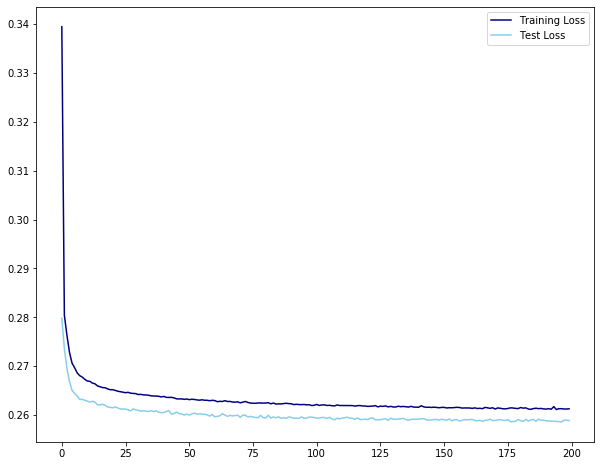

In [89]:
train_loss = history.history['loss']
test_loss = history.history['val_loss']
plt.figure(figsize=(10,8))
plt.plot(train_loss, label="Training Loss", color="navy")
plt.plot(test_loss, label="Test Loss", color="skyblue")
plt.legend();

In [93]:
1- (sum(data['denial_reason_1']!=10)/ sum(data['denial_reason_1']==10))

0.9044257462323932

## Model Binary Target 
1 = approved <br>
0 = denied

In [7]:
data['denial_reason_1'].value_counts()

10    2438617
1       70310
4       45686
3       35458
7       26055
9       20591
6       14124
5       13598
2        6860
8         387
Name: denial_reason_1, dtype: int64

In [8]:
approval_key = {10:1, 1:0, 4:0, 3:0, 7:0, 9:0, 6:0, 5:0, 2:0, 8:0}
data['approved'] = data['denial_reason_1'].map(approval_key)

In [9]:
data['approved'].value_counts()

1    2438617
0     233069
Name: approved, dtype: int64

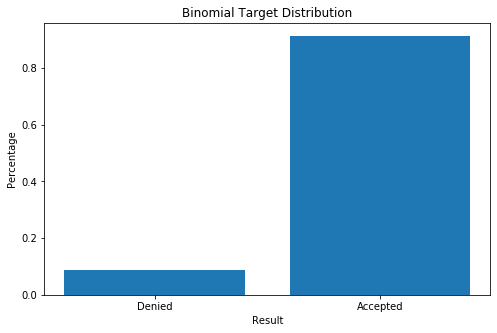

In [10]:
plt.figure(figsize=(8,5))
targets = data['approved'].value_counts(normalize=True)
plt.bar(targets.index, targets.values)
plt.xticks(ticks=[0,1],labels=['Denied', 'Accepted'])
plt.xlabel('Result')
plt.ylabel('Percentage')
plt.title('Binomial Target Distribution')
plt.savefig('../images/binomial_target.png');

In [81]:
# reset X and y 
X = data.drop(columns=['lei','debt_to_income_ratio','denial_reason_1','approved','county_code'])
y = data['approved']

# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=True, stratify = y)

# scale X data
ss = StandardScaler()
Z_train = ss.fit_transform(X_train)
Z_test = ss.transform(X_test)

#change y to binary
y_binary_train = to_categorical(y_train)
y_binary_test = to_categorical(y_test)

p = X_train.shape[1]

### Best NN on Binary Target Data

In [12]:
# Test best NN again with a Binary decision

# build model
model = Sequential()
model.add(Dense(128, input_dim=p, activation="relu"))
model.add(Dropout(.5))
model.add(Dense(24, activation="relu"))
model.add(Dense(2, activation="sigmoid"))

#compile model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
# Fit model
history = model.fit(
    Z_train, y_binary_train,
    validation_data=(Z_test, y_binary_test),
    epochs=100,
    batch_size=512,
    verbose=1
)

Train on 2003764 samples, validate on 667922 samples
Epoch 1/100
2003764/2003764 [==============================] - 7s 4us/sample - loss: 0.1608 - accuracy: 0.9242 - val_loss: 0.1196 - val_accuracy: 0.9342
Epoch 2/100
2003764/2003764 [==============================] - 7s 3us/sample - loss: 0.1207 - accuracy: 0.9332 - val_loss: 0.1170 - val_accuracy: 0.9360
Epoch 3/100
2003764/2003764 [==============================] - 7s 3us/sample - loss: 0.1195 - accuracy: 0.9348 - val_loss: 0.1160 - val_accuracy: 0.9370
Epoch 4/100
2003764/2003764 [==============================] - 7s 3us/sample - loss: 0.1178 - accuracy: 0.9354 - val_loss: 0.1153 - val_accuracy: 0.9375
Epoch 5/100
2003764/2003764 [==============================] - 7s 3us/sample - loss: 0.1176 - accuracy: 0.9357 - val_loss: 0.1150 - val_accuracy: 0.9374
Epoch 6/100
2003764/2003764 [==============================] - 7s 4us/sample - loss: 0.1177 - accuracy: 0.9362 - val_loss: 0.1146 - val_accuracy: 0.9381
Epoch 7/100
2003764/2003764 [

Epoch 54/100
2003764/2003764 [==============================] - 7s 3us/sample - loss: 0.1124 - accuracy: 0.9401 - val_loss: 0.1108 - val_accuracy: 0.9414
Epoch 55/100
2003764/2003764 [==============================] - 7s 3us/sample - loss: 0.1123 - accuracy: 0.9402 - val_loss: 0.1107 - val_accuracy: 0.9415
Epoch 56/100
2003764/2003764 [==============================] - 7s 3us/sample - loss: 0.1123 - accuracy: 0.9402 - val_loss: 0.1108 - val_accuracy: 0.9414
Epoch 57/100
2003764/2003764 [==============================] - 7s 3us/sample - loss: 0.1122 - accuracy: 0.9402 - val_loss: 0.1108 - val_accuracy: 0.9413
Epoch 58/100
2003764/2003764 [==============================] - 7s 4us/sample - loss: 0.1122 - accuracy: 0.9402 - val_loss: 0.1109 - val_accuracy: 0.9414
Epoch 59/100
2003764/2003764 [==============================] - 7s 3us/sample - loss: 0.1122 - accuracy: 0.9403 - val_loss: 0.1107 - val_accuracy: 0.9415
Epoch 60/100
2003764/2003764 [==============================] - 7s 3us/sampl

Text(0.5, 1.0, 'Adam Loss Funtion over Epochs')

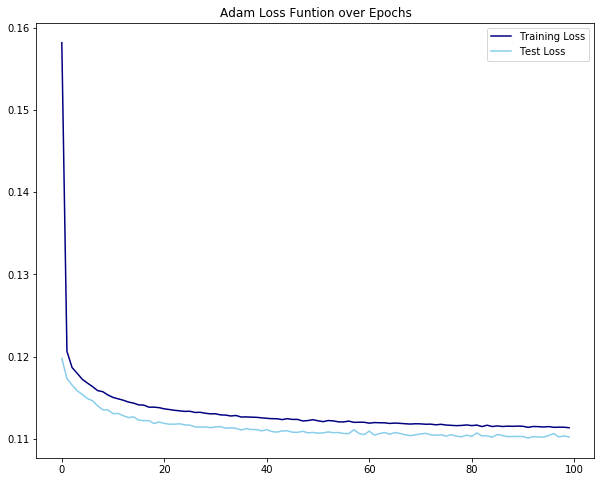

In [64]:
# plot loss funtion
train_loss = history.history['loss']
test_loss = history.history['val_loss']
plt.figure(figsize=(10,8))
plt.plot(train_loss, label="Training Loss", color="navy")
plt.plot(test_loss, label="Test Loss", color="skyblue")
plt.legend()
plt.title('Adam Loss Funtion over Epochs')
#plt.savefig('../images/best_model_loss.png');

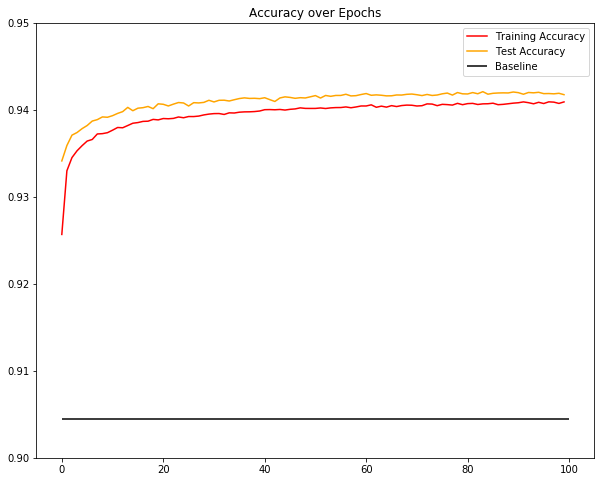

In [139]:
# plot accuracy
train_acc = history.history['accuracy']
test_acc = history.history['val_accuracy']
plt.figure(figsize=(10,8))
plt.plot(train_acc, label="Training Accuracy", color="red")
plt.plot(test_acc, label="Test Accuracy", color="orange")
plt.hlines(.904426,xmin=0, xmax=100, label="Baseline")
plt.ylim(bottom=.9, top=.95)
plt.legend()
plt.title('Accuracy over Epochs')
plt.savefig('../images/best_model_accuracy.png');

In [13]:
preds = model.predict(Z_test)
preds_list = []
for i in range(len(preds)):
    preds_list.append(np.argmax(preds[i]))
accuracy_score(y_test,preds_list)

0.9419138761711697

In [14]:
preds

array([[0.0000000e+00, 1.0000000e+00],
       [6.8302554e-01, 3.1697464e-01],
       [4.3165798e-15, 1.0000000e+00],
       ...,
       [3.4127426e-30, 1.0000000e+00],
       [1.3523011e-22, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00]], dtype=float32)

In [15]:
preds_df = pd.DataFrame(preds, columns = ['denied','approved'])
preds_df.head()

,denied,approved
0,0.000000e+00,1.000000
1,6.830255e-01,0.316975
2,4.316580e-15,1.000000
3,0.000000e+00,1.000000
4,0.000000e+00,1.000000


### Investigate the 'denial' target cases

In [29]:
denials = preds_df[preds_df['denied'] > .5].index

In [85]:
X_test_r = X_test.reset_index(drop=True)

In [86]:
denials_df = X_test_r.iloc[denials]

In [87]:
# investigate preapproval
denials_df['preapproval'].value_counts()

1    51287
0       15
Name: preapproval, dtype: int64

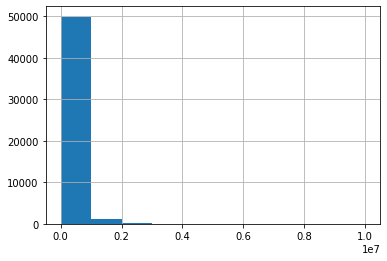

In [88]:
# investigate loan amount
denials_df['loan_amount'].hist()

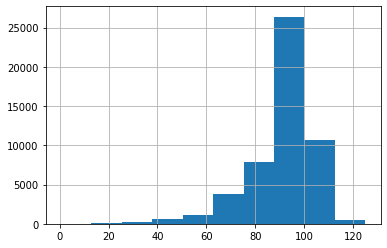

In [40]:
# investigate loan to value
denials_df['combined_loan_to_value_ratio'].hist()

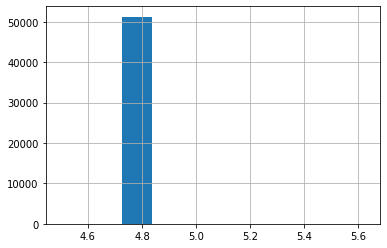

In [41]:
# investigate interest rate
denials_df['interest_rate'].hist()

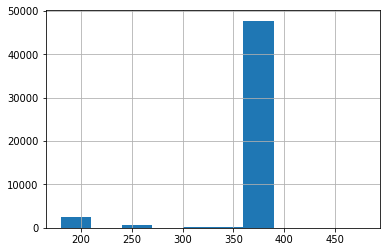

In [42]:
# investigate loan term
denials_df['loan_term'].hist()

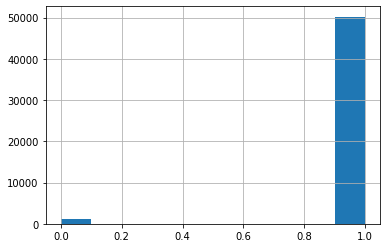

In [43]:
# interest only pymt
denials_df['interest_only_payment'].hist()

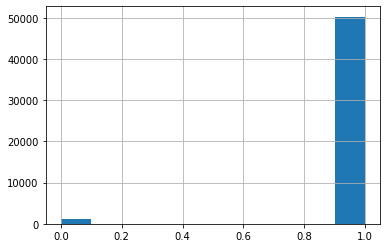

In [44]:
# investigate balloon pymt
denials_df['balloon_payment'].hist()

In [46]:
# investigate property value
denials_df['property_value'].value_counts()

125000.0     2096
135000.0     2011
155000.0     2003
85000.0      1986
165000.0     1870
             ... 
3285000.0       1
2495000.0       1
2675000.0       1
8135000.0       1
7865000.0       1
Name: property_value, Length: 386, dtype: int64

In [48]:
# investigate income
denials_df['income'].value_counts()

0.0       1034
42.0       901
37.0       798
40.0       793
36.0       785
          ... 
1440.0       1
680.0        1
587.0        1
2424.0       1
1091.0       1
Name: income, Length: 1057, dtype: int64

In [49]:
# investigate application submissions
denials_df['submission_of_application'].value_counts()

0    40557
1    10745
Name: submission_of_application, dtype: int64

In [89]:
# select one known denial observation
single_no = denials_df.head(1)
single_no

,census_tract,preapproval,loan_amount,combined_loan_to_value_ratio,interest_rate,loan_term,interest_only_payment,balloon_payment,property_value,occupancy_type,total_units,income,submission_of_application,tract_population,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units,state_code_AL,state_code_AR,state_code_AZ,state_code_CA,state_code_CO,state_code_CT,state_code_DC,state_code_DE,state_code_FL,state_code_GA,state_code_GU,state_code_HI,state_code_IA,state_code_ID,state_code_IL,state_code_IN,state_code_KS,state_code_KY,state_code_LA,state_code_MA,state_code_MD,state_code_ME,state_code_MI,state_code_MN,state_code_MO,state_code_MS,state_code_MT,state_code_NC,state_code_ND,state_code_NE,state_code_NH,state_code_NJ,state_code_NM,state_code_NV,state_code_NY,state_code_OH,state_code_OK,state_code_OR,state_code_PA,state_code_PR,state_code_RI,state_code_SC,state_code_SD,state_code_TN,state_code_TX,state_code_UT,state_code_VA,state_code_VT,state_code_WA,state_code_WI,state_code_WV,state_code_WY,loan_type_2,loan_type_3,loan_type_4
1,4.105101e+10,1,215000.0,80.0,4.75,360.0,1,1,275000.0,1,0,25.0,0,6034,81400,75,1030,1665,38,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [82]:
# scale the denial observation
single_no = ss.transform(single_no)

In [83]:
# check the model prediction
model.predict(single_no)

array([[0.6830256 , 0.31697458]], dtype=float32)

In [69]:
# check all 'denial' observations
no_preds = model.predict(denials_df)

In [70]:
# view predictions
no_preds

array([[0.68297523, 0.3170251 ],
       [0.68297523, 0.3170251 ],
       [0.68297523, 0.3170251 ],
       ...,
       [0.68297523, 0.3170251 ],
       [0.68297523, 0.3170251 ],
       [0.68297523, 0.3170251 ]], dtype=float32)

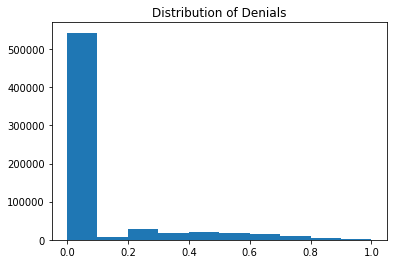

In [59]:
plt.hist(preds_df['denied'])
plt.title('Distribution of Denials');

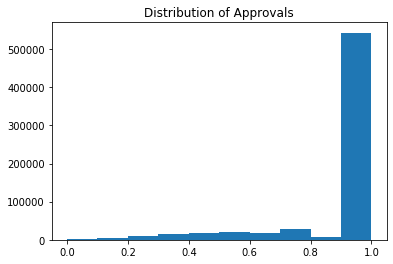

In [60]:
plt.hist(preds_df['approved'])
plt.title('Distribution of Approvals');

In [16]:
# save model
model.save('../models/binary_nn.h5')

#model = load_model('my_model.h5')

In [50]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 128)               9600      
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 24)                3096      
_________________________________________________________________
dense_13 (Dense)             (None, 2)                 50        
Total params: 12,746
Trainable params: 12,746
Non-trainable params: 0
_________________________________________________________________


<Figure size 432x288 with 0 Axes>

In [23]:
model.evaluate(Z_test, y_binary_test, verbose=1)

667922/667922 [==============================] - 9s 13us/sample - loss: 0.1101 - accuracy: 0.9417


[0.11011884871601677, 0.9417357]

### Possible Issues:
It appears the data may have a signal that is not being accounted for in the data. I am unable to get the model to predict a denial with any combination of loan feature combinations. Likely in the EDA process several important features were cut, most likely the debt-to-income ratio and credit score. It is also possible that this data set simply does not contain data that is indicative of whether a loan is approved or not. A subject matter expert should be consulted on the features being considered and see if they agree or not with the method of this model. 

### Logistic Regression on Binary Target

In [61]:
lr = LogisticRegression()

lr.fit(X_train,y_train)

lr_preds = lr.predict(X_test)

accuracy_score(y_test,lr_preds)

0.9127637658289441

## Balance Classes

In [70]:
import random

In [74]:
data['approved'].value_counts()

1    2438617
0     233069
Name: approved, dtype: int64

In [79]:
# count number of denials 
len(data[data['approved'] == 0])

233069

In [90]:
app_index = data[data['approved'] == 1].index

In [95]:
app_index

Int64Index([      0,       1,       2,       3,       4,       5,       6,
                  7,       8,       9,
            ...
            2670834, 2670907, 2670910, 2670959, 2670986, 2671061, 2671147,
            2671370, 2671393, 2671685],
           dtype='int64', length=2438617)

In [101]:
# sample the approvals randomly
approval_index = list(data[data['approved'] == 1].index)
approval_index[-7:]

[2670959, 2670986, 2671061, 2671147, 2671370, 2671393, 2671685]

In [112]:
new_index = random.sample(approval_index,233069)

In [113]:
small_approval_df = data.iloc[new_index]

In [114]:
denial_df = data[data['approved'] == 0]

In [115]:
balanced_data = pd.concat([small_approval_df,denial_df])

In [116]:
balanced_data.head()

,lei,county_code,census_tract,preapproval,loan_amount,combined_loan_to_value_ratio,interest_rate,loan_term,interest_only_payment,balloon_payment,...,state_code_VA,state_code_VT,state_code_WA,state_code_WI,state_code_WV,state_code_WY,loan_type_2,loan_type_3,loan_type_4,approved
95866,7H6GLXDRUGQFU57RNE97,36061.0,3.606103e+10,1,325000.0,80.000,4.375,360.0,1,1,...,0,0,0,0,0,0,0,0,0,1
1092532,549300PT6CCDYU4VHM41,42133.0,4.213301e+10,1,115000.0,92.302,4.125,180.0,1,1,...,0,0,0,0,0,0,0,0,0,1
2430004,549300410TULSMMGDX92,13135.0,1.313505e+10,1,205000.0,96.500,5.125,360.0,1,1,...,0,0,0,0,0,0,1,0,0,1
680928,5493000BR75YQF0VQC27,13135.0,1.313505e+10,1,195000.0,95.000,4.625,360.0,1,1,...,0,0,0,0,0,0,0,0,0,1
1327130,549300GKFNPRWNS0GF29,12057.0,1.205700e+10,0,245000.0,98.200,4.375,360.0,1,1,...,0,0,0,0,0,0,1,0,0,1


In [117]:
balanced_data['approved'].value_counts(normalize=True)

1    0.5
0    0.5
Name: approved, dtype: float64

In [118]:
# reset X and y using balanced classes
X = balanced_data.drop(columns=['lei','debt_to_income_ratio','denial_reason_1','approved','county_code'])
y = balanced_data['approved']


In [119]:
# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=True, stratify = y)

In [120]:
# scale X data
ss = StandardScaler()
Z_train = ss.fit_transform(X_train)
Z_test = ss.transform(X_test)

#change y to binary
y_binary_train = to_categorical(y_train)
y_binary_test = to_categorical(y_test)

p = X_train.shape[1]

In [122]:
len(Z_train)

349603

In [121]:
# Test best NN again with a balanced classes

# build model
model = Sequential()
model.add(Dense(128, input_dim=p, activation="relu"))
model.add(Dropout(.5))
model.add(Dense(24, activation="relu"))
model.add(Dropout(.5))
model.add(Dense(2, activation="sigmoid"))

#compile model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
# Fit model
history = model.fit(
    Z_train, y_binary_train,
    validation_data=(Z_test, y_binary_test),
    epochs=100,
    batch_size=512,
    verbose=1
)

Train on 349603 samples, validate on 116535 samples
Epoch 1/100
349603/349603 [==============================] - 2s 5us/sample - loss: 0.5375 - accuracy: 0.6960 - val_loss: 0.2053 - val_accuracy: 0.9390
Epoch 2/100
349603/349603 [==============================] - 1s 4us/sample - loss: 0.2284 - accuracy: 0.9169 - val_loss: 0.1755 - val_accuracy: 0.9427
Epoch 3/100
349603/349603 [==============================] - 1s 4us/sample - loss: 0.2025 - accuracy: 0.9250 - val_loss: 0.1725 - val_accuracy: 0.9430
Epoch 4/100
349603/349603 [==============================] - 1s 4us/sample - loss: 0.2016 - accuracy: 0.9304 - val_loss: 0.1708 - val_accuracy: 0.9434
Epoch 5/100
349603/349603 [==============================] - 1s 4us/sample - loss: 0.1934 - accuracy: 0.9329 - val_loss: 0.1701 - val_accuracy: 0.9436
Epoch 6/100
349603/349603 [==============================] - 2s 4us/sample - loss: 0.1892 - accuracy: 0.9332 - val_loss: 0.1700 - val_accuracy: 0.9435
Epoch 7/100
349603/349603 [===============

In [123]:
# Test best NN add more layers

# build model
model = Sequential()
model.add(Dense(128, input_dim=p, activation="relu"))
model.add(Dropout(.5))
model.add(Dense(64, input_dim=p, activation="relu"))
model.add(Dropout(.5))
model.add(Dense(24, activation="relu"))
model.add(Dropout(.5))
model.add(Dense(12, activation="relu"))
model.add(Dropout(.5))
model.add(Dense(2, activation="sigmoid"))

#compile model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
# Fit model
history = model.fit(
    Z_train, y_binary_train,
    validation_data=(Z_test, y_binary_test),
    epochs=100,
    batch_size=512,
    verbose=1
)

Train on 349603 samples, validate on 116535 samples
Epoch 1/100
349603/349603 [==============================] - 2s 7us/sample - loss: 0.6995 - accuracy: 0.5077 - val_loss: 0.6631 - val_accuracy: 0.6534
Epoch 2/100
349603/349603 [==============================] - 2s 5us/sample - loss: 0.4131 - accuracy: 0.7977 - val_loss: 0.1912 - val_accuracy: 0.9372
Epoch 3/100
349603/349603 [==============================] - 2s 5us/sample - loss: 0.2200 - accuracy: 0.9278 - val_loss: 0.1818 - val_accuracy: 0.9405
Epoch 4/100
349603/349603 [==============================] - 2s 5us/sample - loss: 0.2000 - accuracy: 0.9361 - val_loss: 0.1760 - val_accuracy: 0.9428
Epoch 5/100
349603/349603 [==============================] - 2s 5us/sample - loss: 0.1933 - accuracy: 0.9375 - val_loss: 0.1753 - val_accuracy: 0.9420
Epoch 6/100
349603/349603 [==============================] - 2s 5us/sample - loss: 0.1891 - accuracy: 0.9384 - val_loss: 0.1741 - val_accuracy: 0.9426
Epoch 7/100
349603/349603 [===============

Text(0.5, 1.0, 'Adam Loss Funtion over Epochs (4-layers)')

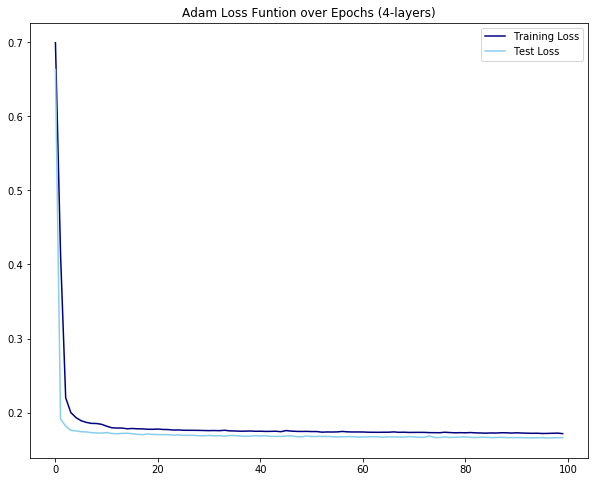

In [124]:
# plot loss funtion
train_loss = history.history['loss']
test_loss = history.history['val_loss']
plt.figure(figsize=(10,8))
plt.plot(train_loss, label="Training Loss", color="navy")
plt.plot(test_loss, label="Test Loss", color="skyblue")
plt.legend()
plt.title('Adam Loss Funtion over Epochs (4-layers)')


In [125]:
# Test best NN add more layers

# build model
model = Sequential()
model.add(Dense(128, input_dim=p, activation="relu"))
model.add(Dropout(.5))
model.add(Dense(128, input_dim=p, activation="relu"))
model.add(Dropout(.5))
model.add(Dense(64, activation="relu"))
model.add(Dropout(.5))
model.add(Dense(24, activation="relu"))
model.add(Dropout(.5))
model.add(Dense(2, activation="sigmoid"))

#compile model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
# Fit model
history = model.fit(
    Z_train, y_binary_train,
    validation_data=(Z_test, y_binary_test),
    epochs=50,
    batch_size=512,
    verbose=1
)

Train on 349603 samples, validate on 116535 samples
Epoch 1/50
349603/349603 [==============================] - 3s 8us/sample - loss: 0.5397 - accuracy: 0.6836 - val_loss: 0.1982 - val_accuracy: 0.9339
Epoch 2/50
349603/349603 [==============================] - 2s 7us/sample - loss: 0.2091 - accuracy: 0.9333 - val_loss: 0.1801 - val_accuracy: 0.9396
Epoch 3/50
349603/349603 [==============================] - 2s 7us/sample - loss: 0.1899 - accuracy: 0.9395 - val_loss: 0.1752 - val_accuracy: 0.9417
Epoch 4/50
349603/349603 [==============================] - 2s 7us/sample - loss: 0.1828 - accuracy: 0.9412 - val_loss: 0.1741 - val_accuracy: 0.9420
Epoch 5/50
349603/349603 [==============================] - 2s 7us/sample - loss: 0.1794 - accuracy: 0.9422 - val_loss: 0.1734 - val_accuracy: 0.9417
Epoch 6/50
349603/349603 [==============================] - 2s 7us/sample - loss: 0.1772 - accuracy: 0.9423 - val_loss: 0.1728 - val_accuracy: 0.9424
Epoch 7/50
349603/349603 [======================

Text(0.5, 1.0, 'Adam Loss Funtion over Epochs (4 large layers)')

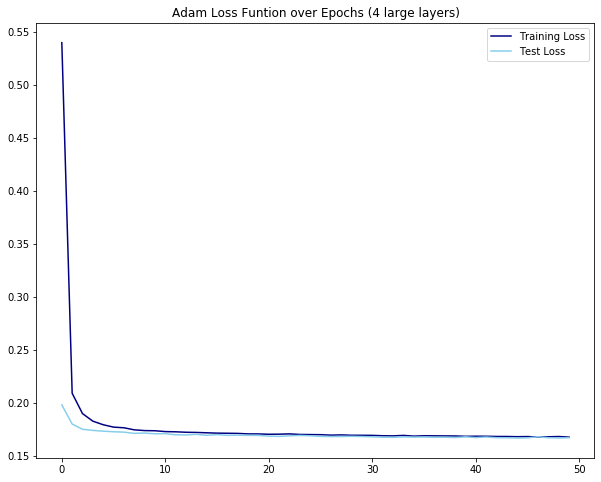

In [126]:
# plot loss funtion
train_loss = history.history['loss']
test_loss = history.history['val_loss']
plt.figure(figsize=(10,8))
plt.plot(train_loss, label="Training Loss", color="navy")
plt.plot(test_loss, label="Test Loss", color="skyblue")
plt.legend()
plt.title('Adam Loss Funtion over Epochs (4 large layers)')

### Change sampling so more data is in train. 90% will be allocated to train

In [22]:
# reset X and y 
X = data.drop(columns=['lei','debt_to_income_ratio','denial_reason_1','approved','county_code'])
y = data['approved']

# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=True, stratify = y, train_size = .9)

# scale X data
ss = StandardScaler()
Z_train = ss.fit_transform(X_train)
Z_test = ss.transform(X_test)

#change y to binary
y_binary_train = to_categorical(y_train)
y_binary_test = to_categorical(y_test)

p = X_train.shape[1]

In [26]:
# check proportion of approvals in train data
sum(y_train)/len(y_train)

0.9127633533054663

In [25]:
# check proportion of approvals in test data
sum(y_test)/len(y_test)

0.9127630825432591

In [27]:
# Test best NN again with a Binary decision and data sets redrawn

# build model
model = Sequential()
model.add(Dense(128, input_dim=p, activation="relu"))
model.add(Dropout(.5))
model.add(Dense(24, activation="relu"))
model.add(Dense(2, activation="sigmoid"))

#compile model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
# Fit model
history = model.fit(
    Z_train, y_binary_train,
    validation_data=(Z_test, y_binary_test),
    epochs=100,
    batch_size=512,
    verbose=1
)

Train on 2404517 samples, validate on 267169 samples
Epoch 1/100
2404517/2404517 [==============================] - 8s 3us/sample - loss: 0.1489 - accuracy: 0.9261 - val_loss: 0.1191 - val_accuracy: 0.9347
Epoch 2/100
2404517/2404517 [==============================] - 7s 3us/sample - loss: 0.1199 - accuracy: 0.9337 - val_loss: 0.1172 - val_accuracy: 0.9360
Epoch 3/100
2404517/2404517 [==============================] - 8s 3us/sample - loss: 0.1182 - accuracy: 0.9349 - val_loss: 0.1164 - val_accuracy: 0.9370
Epoch 4/100
2404517/2404517 [==============================] - 8s 3us/sample - loss: 0.1174 - accuracy: 0.9356 - val_loss: 0.1155 - val_accuracy: 0.9380
Epoch 5/100
2404517/2404517 [==============================] - 7s 3us/sample - loss: 0.1167 - accuracy: 0.9364 - val_loss: 0.1146 - val_accuracy: 0.9387
Epoch 6/100
2404517/2404517 [==============================] - 7s 3us/sample - loss: 0.1159 - accuracy: 0.9369 - val_loss: 0.1140 - val_accuracy: 0.9388
Epoch 7/100
2404517/2404517 [

Epoch 54/100
2404517/2404517 [==============================] - 7s 3us/sample - loss: 0.1120 - accuracy: 0.9404 - val_loss: 0.1111 - val_accuracy: 0.9411
Epoch 55/100
2404517/2404517 [==============================] - 7s 3us/sample - loss: 0.1120 - accuracy: 0.9404 - val_loss: 0.1109 - val_accuracy: 0.9413
Epoch 56/100
2404517/2404517 [==============================] - 9s 4us/sample - loss: 0.1119 - accuracy: 0.9405 - val_loss: 0.1108 - val_accuracy: 0.9415
Epoch 57/100
2404517/2404517 [==============================] - 8s 3us/sample - loss: 0.1119 - accuracy: 0.9405 - val_loss: 0.1107 - val_accuracy: 0.9415
Epoch 58/100
2404517/2404517 [==============================] - 7s 3us/sample - loss: 0.1119 - accuracy: 0.9404 - val_loss: 0.1107 - val_accuracy: 0.9415
Epoch 59/100
2404517/2404517 [==============================] - 7s 3us/sample - loss: 0.1118 - accuracy: 0.9405 - val_loss: 0.1108 - val_accuracy: 0.9414
Epoch 60/100
2404517/2404517 [==============================] - 8s 3us/sampl

In [44]:
accuracy_score(y_test,preds_list)

0.9411870389154431

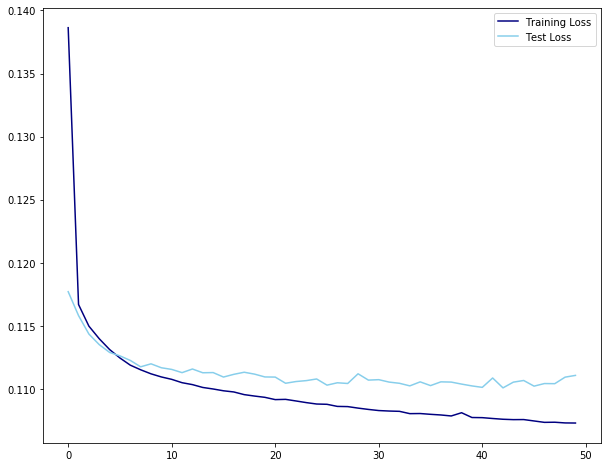

In [45]:
train_loss = history.history['loss']
test_loss = history.history['val_loss']
plt.figure(figsize=(10,8))
plt.plot(train_loss, label="Training Loss", color="navy")
plt.plot(test_loss, label="Test Loss", color="skyblue")
plt.legend()
